<a href="https://colab.research.google.com/github/cesaroliveiragoes/Statistics-for-Data-Science/blob/main/class_11_Distribui%C3%A7%C3%A3o_Discreta_(01_09_2023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplos distribuições discretas

In [ ]:
import pandas as np
import pandas as pd
import matplotlib.pyplot as plt

#datas
import datetime

# estatistica
from scipy.stats import binom, poisson

## Carregar

In [ ]:
dados_acidentes = pd.read_csv('acidentes.csv')
dados_acidentes

,id_acidente,data_acidente,tipo_lesao,risco_classificacao
0,1,2014-02-11,Laceração,Leve
1,2,2014-02-05,Ferimentos Perfurantes,Médio
2,3,2014-01-31,Contusão,Leve
3,4,2014-01-13,Corte,Leve
4,5,2014-02-14,Contusão,Médio
...,...,...,...,...
436,489,2018-04-14,Corte,Médio
437,490,2018-04-24,Corte,Médio
438,491,2018-05-04,Torção,Leve
439,492,2018-05-10,Queimadura,Leve


## Histograma


In [ ]:
dados_acidentes.dtypes

id_acidente             int64
data_acidente          object
tipo_lesao             object
risco_classificacao    object
dtype: object

In [ ]:
dados_acidentes['data_acidente'] = pd.to_datetime(dados_acidentes['data_acidente'], errors = 'coerce')

In [ ]:
dados_acidentes.dtypes

id_acidente                     int64
data_acidente          datetime64[ns]
tipo_lesao                     object
risco_classificacao            object
dtype: object

In [ ]:
dados_acidentes['data_acidente_mensal'] = dados_acidentes['data_acidente'].dt.strftime('%Y-%m')

In [ ]:
dados_acidentes.head()

,id_acidente,data_acidente,tipo_lesao,risco_classificacao,data_acidente_mensal
0,1,2014-02-11,Laceração,Leve,2014-02
1,2,2014-02-05,Ferimentos Perfurantes,Médio,2014-02
2,3,2014-01-31,Contusão,Leve,2014-01
3,4,2014-01-13,Corte,Leve,2014-01
4,5,2014-02-14,Contusão,Médio,2014-02


In [ ]:
#groupby pelo mensal e tansformar em um DF
dados_acidentes_mensal = dados_acidentes.groupby('data_acidente_mensal') \
               .size() \
               .to_frame('n') \
               .reset_index()

In [ ]:
dados_acidentes_mensal

,data_acidente_mensal,n
0,2013-07,1
1,2014-01,15
2,2014-02,12
3,2014-03,11
4,2014-04,10
5,2014-05,8
6,2014-06,6
7,2014-07,6
8,2014-08,12
9,2014-09,7


(array([ 3.,  6., 12.,  5.,  9.,  7.,  5.,  3.,  3.,  1.]),
 array([ 1. ,  2.7,  4.4,  6.1,  7.8,  9.5, 11.2, 12.9, 14.6, 16.3, 18. ]),
 <BarContainer object of 10 artists>)

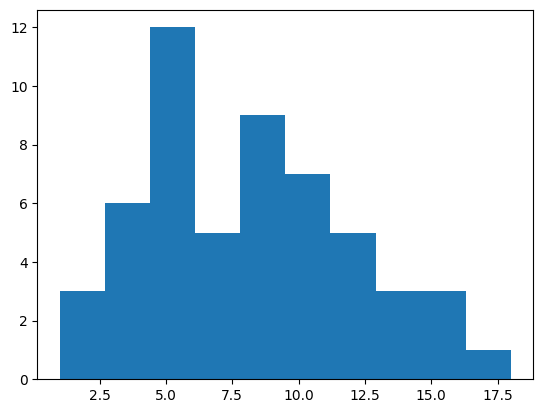

In [ ]:
#A melhor distribuição seria a poisson aqui

plt.hist(dados_acidentes_mensal['n'])


## Obter as probabilidades de acidentes

In [ ]:
media_mensal = dados_acidentes_mensal['n'].mean()
media_mensal

8.166666666666666

P(x=7)


In [ ]:
#Qual a probabilidade de ocorrer 7 acidentes?
p7 = poisson.pmf(k=7, mu = media_mensal)

In [ ]:
f"A probabilidade de 7 acidentes é de {p7*100:.2f}%"

'A probabilidade de 7 acidentes é de 13.65%'

P(4 <= X <= 6)

In [ ]:
#Qual a probabilidade de ocorrer 4 a 6 acidentes?

p4a6 = sum(poisson.pmf(k=[4,5,6], mu = media_mensal))

In [ ]:
f"A probabilidade de 4 a 6 acidentes é de {p4a6*100:.2f}%"

'A probabilidade de 4 a 6 acidentes é de 25.56%'